# Installing the libraries and importing them

In [14]:
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [18]:
#video feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        cv2.imshow('Mediapipe Feed', frame)
    else:
        print("Error Occured in capturing the video frame")
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Making Detections

In [ ]:
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = pose.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


            cv2.imshow('Mediapipe Feed', image)
        else:
            print("Error Occured in capturing the video frame")

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

NameError: name 'mp_pose' is not defined

In [ ]:
mp_drawing.DrawingSpec

NameError: name 'mp_drawing' is not defined

# Determining Joints

In [ ]:
landmarks = results.pose_landmarks.landmark

In [ ]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]

x: 0.7506812810897827
y: 0.505593478679657
z: -0.818374514579773
visibility: 0.999198317527771

In [ ]:
len(landmarks)

33

# Calculating Angle

In [ ]:
def compute_angle(pointA, pointB, pointC):
    """
    The angle is formed at pointB.
    """
    # Convert points to numpy arrays
    pointA = np.array(pointA)
    pointB = np.array(pointB)
    pointC = np.array(pointC)

    # Compute the vectors
    vectorAB = pointA - pointB
    vectorBC = pointC - pointB

    # Compute the dot product
    dot_product = np.dot(vectorAB, vectorBC)
    normAB = np.linalg.norm(vectorAB)
    normBC = np.linalg.norm(vectorBC)

    # Compute the cosine of the angle
    cosine_angle = dot_product / (normAB * normBC)

    # Clip the cosine value to handle possible floating point errors
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)

    # Compute the angle in degrees
    angle = np.degrees(np.arccos(cosine_angle))

    return angle

In [ ]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [ ]:
shoulder, elbow, wrist

([0.7285194993019104, 0.7301807999610901],
 [0.8457075357437134, 1.0216059684753418],
 [0.9064093828201294, 1.4371989965438843])

In [ ]:
compute_angle(shoulder, elbow, wrist)

166.40383477015365

In [ ]:
landmarks

[x: 0.4746124744415283
y: 0.4303029179573059
z: -0.8543834686279297
visibility: 0.9990198612213135
, x: 0.49366116523742676
y: 0.3713296353816986
z: -0.8129380345344543
visibility: 0.9987787008285522
, x: 0.5099692344665527
y: 0.371355801820755
z: -0.8128529787063599
visibility: 0.9989534020423889
, x: 0.5279386043548584
y: 0.37233811616897583
z: -0.813098132610321
visibility: 0.9990466237068176
, x: 0.44226962327957153
y: 0.3765348494052887
z: -0.8058664202690125
visibility: 0.9982712864875793
, x: 0.42297154664993286
y: 0.380207359790802
z: -0.8052166700363159
visibility: 0.9979507923126221
, x: 0.4059143662452698
y: 0.38399478793144226
z: -0.8054655194282532
visibility: 0.9976407885551453
, x: 0.5616739988327026
y: 0.4070237874984741
z: -0.4937477111816406
visibility: 0.9994766712188721
, x: 0.3864353597164154
y: 0.42202404141426086
z: -0.43944239616394043
visibility: 0.9981648325920105
, x: 0.5085324645042419
y: 0.500539243221283
z: -0.7317055463790894
visibility: 0.999643206596374

In [ ]:
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = pose.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            try:
                landmarks = results.pose_landmarks.landmark
                
                shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                
                angle = compute_angle(shoulder, elbow, wrist)
                
                cv2.putText(image, str(angle),
                           tuple(np.multiply(elbow, [image.shape[0], image.shape[1]]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                
            except:
                pass
            
            
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


            cv2.imshow('Mediapipe Feed', image)
        else:
            print("Error Occured in capturing the video frame")

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

# Exercise Counter

In [ ]:
counter = 0
pos = 'down'

cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = pose.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            try:
                landmarks = results.pose_landmarks.landmark
                
                shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                
                angle = compute_angle(shoulder, elbow, wrist)
                
                if angle<30 and pos=='up':
                    counter+=1
                    pos = 'down'
                    print('Count:', counter)   
                elif angle>140:
                    pos = 'up'
     
                
                cv2.putText(image, str(angle),
                           tuple(np.multiply(elbow, [image.shape[0], image.shape[1]-100]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
                
            except:
                pass
            
            #printing the counter variable
            cv2.rectangle(image, (0,0), (300, 70), (245,117,15), -1)
            
            cv2.putText(image, 'REPS', (10,12),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), (10, 60),
                       cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255,255),2,cv2.LINE_AA)
            
            cv2.putText(image, 'STAGE', (100, 14),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, pos, (90, 60),
                       cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


            cv2.imshow('Mediapipe Feed', image)
        else:
            print("Error Occured in capturing the video frame")

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

Count: 1
Count: 2
Count: 3
Count: 4
Count: 5
Count: 6
Count: 7
Count: 8
Count: 9
Count: 10


# Calculating the correct angle for a pose

In [ ]:
angles_to_compute = ['LEFT_ELBOW', 'RIGHT_ELBOW', 'LEFT_SHOULDER', 'RIGHT_SHOULDER', 'LEFT_HIP', 'RIGHT_HIP', 'LEFT_KNEE', 'RIGHT_KNEE']

In [ ]:
angle_dict = {
    'LEFT_ELBOW' : ['LEFT_WRIST', 'LEFT_ELBOW', 'LEFT_SHOULDER'],
    'RIGHT_ELBOW' : ['RIGHT_WRIST', 'RIGHT_ELBOW', 'RIGHT_SHOULDER'],
    'LEFT_SHOULDER' : ['LEFT_WRIST', 'LEFT_SHOULDER', 'LEFT_HIP'],
    'RIGHT_SHOULDER' : ['RIGHT_WRIST', 'RIGHT_SHOULDER', 'RIGHT_HIP'],
    'LEFT_HIP' : ['LEFT_SHOULDER', 'LEFT_HIP', 'LEFT_KNEE'],
    'RIGHT_HIP' : ['RIGHT_SHOULDER', 'RIGHT_HIP', 'RIGHT_KNEE'],
    'LEFT_KNEE' : ['LEFT_HIP', 'LEFT_KNEE', 'LEFT_ANKLE'],
    'RIGHT_KNEE' : ['RIGHT_HIP', 'RIGHT_KNEE', 'RIGHT_ANKLE']
}

In [ ]:
def compute_angle(pointA, pointB, pointC):
    """
    The angle is formed at pointB.
    """
    # Convert points to numpy arrays
    pointA = np.array(pointA)
    pointB = np.array(pointB)
    pointC = np.array(pointC)

    # Compute the vectors
    vectorAB = pointA - pointB
    vectorBC = pointC - pointB

    # Compute the dot product
    dot_product = np.dot(vectorAB, vectorBC)
    normAB = np.linalg.norm(vectorAB)
    normBC = np.linalg.norm(vectorBC)

    # Compute the cosine of the angle
    cosine_angle = dot_product / (normAB * normBC)

    # Clip the cosine value to handle possible floating point errors
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)

    # Compute the angle in degrees
    angle = np.degrees(np.arccos(cosine_angle))

    return angle

In [ ]:
warrior2 = dict()

In [ ]:
pose1_data = dict()
image = cv2.imread('pose1_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image.flags.writeable = False

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    results = pose.process(image)

#     image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

try:
    landmarks = results.pose_landmarks.landmark
    L_EAR = landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]
    R_EAR = landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value]
    

    for i in angles_to_compute:
        angleA = angle_dict[i]
#         print(angleA)
        
        p1 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].y]
        p2 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].y]
        p3 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].y]
#         print((p1, p2, p3))
        
        angle = compute_angle(p1, p2, p3)
        print(f"{angleA[1]}",angle)
        pose1_data[angleA[1]] = angle
        

except:
    print("Check the code:: Some ERROR Occured")


if (np.abs(R_EAR.z) > np.abs(L_EAR.z)):
    warrior2['right'] = pose1_data
else:
    warrior2['left'] = pose1_data


mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                          mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


LEFT_ELBOW 171.463848190065
RIGHT_ELBOW 174.98635018717388
LEFT_SHOULDER 109.86979303739894
RIGHT_SHOULDER 90.12064197368086
LEFT_HIP 134.78165201458543
RIGHT_HIP 161.80173069669888
LEFT_KNEE 136.06381091571686
RIGHT_KNEE 178.96873613912


In [ ]:
pose1_data

{'LEFT_ELBOW': 171.463848190065,
 'RIGHT_ELBOW': 174.98635018717388,
 'LEFT_SHOULDER': 109.86979303739894,
 'RIGHT_SHOULDER': 90.12064197368086,
 'LEFT_HIP': 134.78165201458543,
 'RIGHT_HIP': 161.80173069669888,
 'LEFT_KNEE': 136.06381091571686,
 'RIGHT_KNEE': 178.96873613912}

In [ ]:
pose1_data = dict()
image = cv2.imread('pose1.jpg')   #left faced
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image.flags.writeable = False

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    results = pose.process(image)

#     image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

try:
    landmarks = results.pose_landmarks.landmark
    L_EAR = landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]
    R_EAR = landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value]
    

    for i in angles_to_compute:
        angleA = angle_dict[i]
#         print(angleA)
        
        p1 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].y]
        p2 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].y]
        p3 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].y]
#         print((p1, p2, p3))
        
        angle = compute_angle(p1, p2, p3)
        print(f"{angleA[1]}",angle)
        pose1_data[angleA[1]] = angle
        

except:
    print("Check the code:: Some ERROR Occured")


if (np.abs(R_EAR.z) > np.abs(L_EAR.z)):
    warrior2['right'] = pose1_data
else:
    warrior2['left'] = pose1_data


mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                          mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

LEFT_ELBOW 171.89422626963878
RIGHT_ELBOW 172.81736340827243
LEFT_SHOULDER 94.70702512236936
RIGHT_SHOULDER 100.66053104532824
LEFT_HIP 147.91380157590103
RIGHT_HIP 111.33892650876699
LEFT_KNEE 173.98235368483085
RIGHT_KNEE 127.68747194766534


In [ ]:
warrior2

{'right': {'LEFT_ELBOW': 171.463848190065,
  'RIGHT_ELBOW': 174.98635018717388,
  'LEFT_SHOULDER': 109.86979303739894,
  'RIGHT_SHOULDER': 90.12064197368086,
  'LEFT_HIP': 134.78165201458543,
  'RIGHT_HIP': 161.80173069669888,
  'LEFT_KNEE': 136.06381091571686,
  'RIGHT_KNEE': 178.96873613912},
 'left': {'LEFT_ELBOW': 171.89422626963878,
  'RIGHT_ELBOW': 172.81736340827243,
  'LEFT_SHOULDER': 94.70702512236936,
  'RIGHT_SHOULDER': 100.66053104532824,
  'LEFT_HIP': 147.91380157590103,
  'RIGHT_HIP': 111.33892650876699,
  'LEFT_KNEE': 173.98235368483085,
  'RIGHT_KNEE': 127.68747194766534}}

# Calculate the angle of done pose

In [ ]:
#from image
error_thres = 20

image = cv2.imread('') #just put a image file demonstrating a human pose
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    results = pose.process(image)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

try:
    landmarks = results.pose_landmarks.landmark    
    for i in angles_to_compute:
        angleA = angle_dict[i]
#         print(angleA)
        
        p1 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].y]
        p2 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].y]
        p3 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].y]
#         print((p1, p2, p3))
        
        angle = compute_angle(p1, p2, p3)
        print(f"{angleA[1]}",angle)
        
        if np.abs((angle - pose1_data[i])) > error_thres:
            print(f'Please make the angle at {i} to {pose1_data[i]}')

except:
    print("Check the code:: Some ERROR Occured")


mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                          mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Prompt for Angle Correction 

In [ ]:
error_thres = 15

pose1_test = dict()
image = cv2.imread('pose1_wrong.jpg')   #left faced
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    results = pose.process(image)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

try:
    landmarks = results.pose_landmarks.landmark
    L_EAR = landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]
    R_EAR = landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value]
#     print((L_EAR.z, R_EAR.z))
    

    for i in angles_to_compute:
        angleA = angle_dict[i]
#         print(angleA)
        
        p1 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].y]
        p2 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].y]
        p3 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].y]
#         print((p1, p2, p3))
        
        angle = compute_angle(p1, p2, p3)
#         print(f"{angleA[1]}",angle)
        pose1_test[angleA[1]] = angle
        
        if (np.abs(R_EAR.z) > np.abs(L_EAR.z)):
            if (np.abs((warrior2['right'][i] - angle)) > error_thres):
                print(f'Angle for joint {i} should be {warrior2["right"][i]} but it is now {angle}')
            else:
                pass
        else:
            if (np.abs((warrior2['left'][i] - angle)) > error_thres):
                print(f'Angle for joint {i} should be {warrior2["left"][i]} but it is now {angle}')
            else:
                pass

except:
    print("Check the code:: Some ERROR Occured")
    
    
mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                          mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


cv2.imshow('Mediapipe Feed', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Angle for joint LEFT_SHOULDER should be 94.70702512236936 but it is now 177.197010348329
Angle for joint RIGHT_SHOULDER should be 100.66053104532824 but it is now 179.1904725013081
Angle for joint RIGHT_KNEE should be 127.68747194766534 but it is now 143.87196330103595


In [ ]:
warrior2['left']['LEFT_ELBOW']

171.89422626963878

# Angle correction from video

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark
            L_EAR = landmarks[mp_pose.PoseLandmark.LEFT_EAR.value]
            R_EAR = landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value]
        #     print((L_EAR.z, R_EAR.z))


            for i in angles_to_compute:
                angleA = angle_dict[i]
        #         print(angleA)

                p1 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[0]).value].y]
                p2 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[1]).value].y]
                p3 = [landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].x, landmarks[getattr(mp_pose.PoseLandmark, angleA[2]).value].y]
        #         print((p1, p2, p3))

                angle = compute_angle(p1, p2, p3)
        #         print(f"{angleA[1]}",angle)
                pose1_test[angleA[1]] = angle

                if (np.abs(R_EAR.z) > np.abs(L_EAR.z)):
                    if (np.abs((warrior2['right'][i] - angle)) > error_thres):
                        print(f'Angle for joint {i} should be {warrior2["right"][i]} but it is now {angle}')
                    else:
                        pass
                else:
                    if (np.abs((warrior2['left'][i] - angle)) > error_thres):
                        print(f'Angle for joint {i} should be {warrior2["left"][i]} but it is now {angle}')
                    else:
                        pass

        except:
            print("Check the code:: Some ERROR Occured")



        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))


        cv2.imshow('Mediapipe Feed', image)
    else:
        print("Error Occured in capturing the video frame")

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Pose Classification

In [ ]:
#importing the libraries
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

ModuleNotFoundError: No module named 'mediapipe'

In [ ]:
#defining the path of input Images
train_path = "C:\Users\Akram\Documents\Pose Detection (project 1)\yoga_poses\train"
test_path = "C:\Users\Akram\Documents\Pose Detection (project 1)\yoga_poses\test"

output_image_dir = "C:\Users\Akram\Documents\Pose Detection (project 1)\\posed_image"
os.mkdir(output_image_dir)

In [ ]:
os.listdir(train_path + '\\chair')[:5]

['girl1_chair070.jpg',
 'girl1_chair075.jpg',
 'girl1_chair076.jpg',
 'girl1_chair080.jpg',
 'girl1_chair081.jpg']

In [ ]:
os.chdir(output_image_dir)

In [ ]:
os.getcwd()

NameError: name 'os' is not defined

In [ ]:
def process_pose(image_path):
    df = pd.DataFrame()
    dir_list = os.listdir(image_path)
    os.chdir(output_image_dir)
    for folder in dir_list:
        path = image_path + '\\' + folder
#         print(path)
        
        all_dict = dict()
        for im in os.listdir(path):
            image = cv2.imread(path + '\\' + im)
#             print(image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            with mp_pose.Pose(min_detection_confidence=0.35, min_tracking_confidence=0.35) as pose:
                results = pose.process(image)

            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            try:
                landmarks = results.pose_landmarks.landmark
#                 print(list(landmark)[0])
                landmarks = list(landmarks)
                all_points = list()
                for ll in landmarks:
                    all_points.extend([ll.x, ll.y, ll.z, ll.visibility])
                all_points.append(folder)       #appending class name
                all_dict[im.rstrip('.jpg')] = all_points
    #             print(all_dict)
                df1 = pd.DataFrame(all_dict).T
                df = pd.concat([df, df1], ignore_index=False)
            except:
                print(f'Some Error Occured image:{im}, folder:{folder}')
                
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))
            
            if image is not None:
                # Write the image to disk
                cv2.imwrite(im, image)
#                 print("Image written to disk.")
            else:
                print("Failed to load the image.")
            
            
    return df

In [ ]:
data = process_pose(train_path)
display(data)

Some Error Occured image:girl3_chair110.jpg, folder:chair
Some Error Occured image:girl3_chair122.jpg, folder:chair
Some Error Occured image:girl3_chair123.jpg, folder:chair
Some Error Occured image:girl3_chair131.jpg, folder:chair
Some Error Occured image:girl3_chair133.jpg, folder:chair
Some Error Occured image:girl3_cobra076.jpg, folder:cobra
Some Error Occured image:girl3_cobra078.jpg, folder:cobra
Some Error Occured image:girl3_cobra079.jpg, folder:cobra
Some Error Occured image:girl3_cobra082.jpg, folder:cobra
Some Error Occured image:girl3_cobra088.jpg, folder:cobra
Some Error Occured image:girl3_cobra092.jpg, folder:cobra
Some Error Occured image:girl3_cobra094.jpg, folder:cobra
Some Error Occured image:girl3_cobra096.jpg, folder:cobra
Some Error Occured image:girl2_dog104.jpg, folder:dog
Some Error Occured image:girl3_tree138.jpg, folder:tree
Some Error Occured image:girl2_warrior078.jpg, folder:warrior
Some Error Occured image:girl2_warrior079.jpg, folder:warrior


,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
girl1_chair070,0.540704,0.307021,-0.406248,0.99838,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.88315,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.86571,chair
girl1_chair070,0.540704,0.307021,-0.406248,0.99838,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.88315,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.86571,chair
girl1_chair075,0.556438,0.332065,-0.315622,0.998887,0.554069,0.316306,-0.29462,0.998698,0.554011,0.315124,...,0.806321,0.565274,0.895351,0.404273,0.51759,0.561915,0.917764,0.100973,0.76825,chair
girl1_chair070,0.540704,0.307021,-0.406248,0.99838,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.88315,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.86571,chair
girl1_chair075,0.556438,0.332065,-0.315622,0.998887,0.554069,0.316306,-0.29462,0.998698,0.554011,0.315124,...,0.806321,0.565274,0.895351,0.404273,0.51759,0.561915,0.917764,0.100973,0.76825,chair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
guy2_warrior137,0.533357,0.533256,-0.959344,0.999984,0.542256,0.5252,-0.96922,0.999987,0.547778,0.522967,...,0.922528,0.491664,0.949168,-0.193383,0.994103,0.392687,0.362893,0.099135,0.945941,warrior
guy2_warrior139,0.522516,0.503786,-1.016637,0.999997,0.529043,0.49529,-1.018984,0.999998,0.533865,0.492829,...,0.944492,0.481859,0.942609,-0.374395,0.992606,0.390602,0.348813,-0.411831,0.965582,warrior
guy2_warrior145,0.484487,0.431701,-1.142746,0.999738,0.494848,0.416455,-1.149475,0.999846,0.500758,0.41241,...,0.483203,0.454223,0.930922,-0.266587,0.949893,0.391117,0.452464,0.316899,0.602259,warrior
guy2_warrior148,0.464814,0.374368,-1.0816,0.99979,0.469511,0.362136,-1.097074,0.99983,0.473353,0.359905,...,0.783749,0.465178,0.684914,0.59108,0.350016,0.450799,0.921283,-0.076999,0.895923,warrior


In [ ]:
#Saving data to a csv file
os.chdir('C:\Users\Akram\Documents\Pose Detection (project 1)\Pose Detection (project 1)')
data.to_csv('pose.csv')

In [ ]:
#Load the csv
data = pd.read_csv('pose.csv', index_col=0)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
girl1_chair070,0.540704,0.307021,-0.406248,0.998380,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.883150,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.86571,chair
girl1_chair070,0.540704,0.307021,-0.406248,0.998380,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.883150,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.86571,chair
girl1_chair075,0.556438,0.332065,-0.315622,0.998887,0.554069,0.316306,-0.294620,0.998698,0.554011,0.315124,...,0.806321,0.565274,0.895351,0.404273,0.517590,0.561915,0.917764,0.100973,0.76825,chair
girl1_chair070,0.540704,0.307021,-0.406248,0.998380,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.883150,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.86571,chair
girl1_chair075,0.556438,0.332065,-0.315622,0.998887,0.554069,0.316306,-0.294620,0.998698,0.554011,0.315124,...,0.806321,0.565274,0.895351,0.404273,0.517590,0.561915,0.917764,0.100973,0.76825,chair


In [ ]:
data.shape

(97139, 133)

In [ ]:
#Independent Variable
x = data.drop(['132'], axis=1)
x = x.astype('float')
x.info()
display(x)
x = np.array(x)
# print(x)

<class 'pandas.core.frame.DataFrame'>
Index: 97139 entries, girl1_chair070 to guy2_warrior150
Columns: 132 entries, 0 to 131
dtypes: float64(132)
memory usage: 100.6+ MB


,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
girl1_chair070,0.540704,0.307021,-0.406248,0.998380,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.121485,0.883150,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.865710
girl1_chair070,0.540704,0.307021,-0.406248,0.998380,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.121485,0.883150,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.865710
girl1_chair075,0.556438,0.332065,-0.315622,0.998887,0.554069,0.316306,-0.294620,0.998698,0.554011,0.315124,...,0.120158,0.806321,0.565274,0.895351,0.404273,0.517590,0.561915,0.917764,0.100973,0.768250
girl1_chair070,0.540704,0.307021,-0.406248,0.998380,0.539227,0.290466,-0.383949,0.998162,0.539993,0.289608,...,0.121485,0.883150,0.544375,0.888191,0.430857,0.600681,0.539234,0.909821,0.017473,0.865710
girl1_chair075,0.556438,0.332065,-0.315622,0.998887,0.554069,0.316306,-0.294620,0.998698,0.554011,0.315124,...,0.120158,0.806321,0.565274,0.895351,0.404273,0.517590,0.561915,0.917764,0.100973,0.768250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
guy2_warrior137,0.533357,0.533256,-0.959344,0.999984,0.542256,0.525200,-0.969220,0.999987,0.547778,0.522967,...,0.210337,0.922528,0.491664,0.949168,-0.193383,0.994103,0.392687,0.362893,0.099135,0.945941
guy2_warrior139,0.522516,0.503786,-1.016637,0.999997,0.529043,0.495290,-1.018984,0.999998,0.533865,0.492829,...,-0.237725,0.944492,0.481859,0.942609,-0.374395,0.992606,0.390602,0.348813,-0.411831,0.965582
guy2_warrior145,0.484487,0.431701,-1.142746,0.999738,0.494848,0.416455,-1.149475,0.999846,0.500758,0.412410,...,0.465483,0.483203,0.454223,0.930922,-0.266587,0.949893,0.391117,0.452464,0.316899,0.602259
guy2_warrior148,0.464814,0.374368,-1.081600,0.999790,0.469511,0.362136,-1.097074,0.999830,0.473353,0.359905,...,0.142920,0.783749,0.465178,0.684914,0.591080,0.350016,0.450799,0.921283,-0.076999,0.895923


In [ ]:
#Dependent variable
pose_class = data.iloc[:, -1]
print(pose_class.unique())
print(len(pose_class))

labelE = LabelEncoder()
pose_class_encoded = labelE.fit_transform(pose_class)
print(pose_class_encoded[:-1])

['chair' 'cobra' 'dog' 'tree' 'warrior']
97139
[0 0 0 ... 4 4 4]


In [ ]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
modelANN = Sequential([
    Dense(100, input_shape=(132,), activation='relu'),
    Dropout(0.1),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')
])

modelANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

modelANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               13300     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               25856     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               1

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
historyANN = modelANN.fit(x, pose_class_encoded, batch_size=32, epochs=100, validation_split=0.15, callbacks=[early_stop])

Epoch 1/100
2581/2581 [==============================] - 42s 9ms/step - loss: 0.6538 - accuracy: 0.6662 - val_loss: 2.8980 - val_accuracy: 0.8214
Epoch 2/100
2581/2581 [==============================] - 27s 11ms/step - loss: 0.4574 - accuracy: 0.7940 - val_loss: 3.8228 - val_accuracy: 0.8113
Epoch 3/100
2581/2581 [==============================] - 29s 11ms/step - loss: 0.1801 - accuracy: 0.9532 - val_loss: 7.5388 - val_accuracy: 0.8146
Epoch 4/100
2581/2581 [==============================] - 30s 11ms/step - loss: 0.1154 - accuracy: 0.9710 - val_loss: 2.1110 - val_accuracy: 0.8553
Epoch 5/100
2581/2581 [==============================] - 29s 11ms/step - loss: 0.0764 - accuracy: 0.9821 - val_loss: 6.3698 - val_accuracy: 0.8566
Epoch 6/100
2581/2581 [==============================] - 31s 12ms/step - loss: 0.1229 - accuracy: 0.9679 - val_loss: 3.6583 - val_accuracy: 0.7409
Epoch 7/100
2581/2581 [==============================] - 29s 11ms/step - loss: 0.0844 - accuracy: 0.9777 - val_loss: 0.

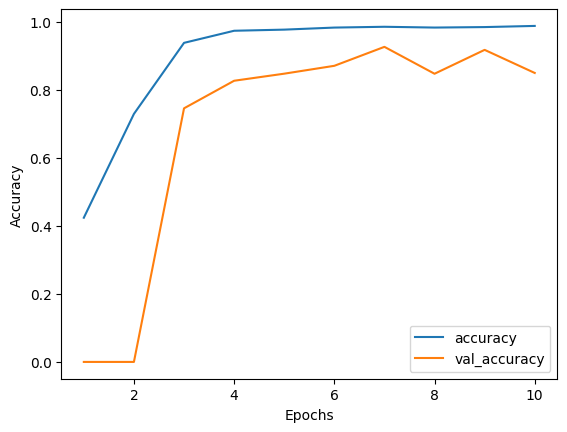

In [ ]:
plt.plot(range(1, len(historyANN.history['accuracy'])+1), historyANN.history['accuracy'], label='accuracy')
plt.plot(range(1, len(historyANN.history['val_accuracy'])+1), historyANN.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

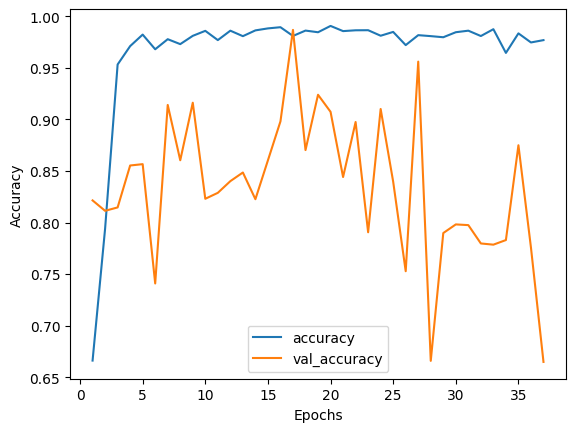

In [ ]:
plt.plot(range(1, len(historyANN.history['accuracy'])+1), historyANN.history['accuracy'], label='accuracy')
plt.plot(range(1, len(historyANN.history['val_accuracy'])+1), historyANN.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

**Predicting Pose**

In [ ]:
# def process_image_pose(image_path):
#     df = pd.DataFrame()
#     dir_list = os.listdir(image_path)
#     os.chdir(output_image_dir)
#     for folder in dir_list:
#         path = image_path + '\\' + folder
# #         print(path)
        
#         all_dict = dict()
#         for im in os.listdir(path):
#             image = cv2.imread(path + '\\' + im)
# #             print(image)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#             with mp_pose.Pose(min_detection_confidence=0.35, min_tracking_confidence=0.35) as pose:
#                 results = pose.process(image)

#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
#             try:
#                 landmarks = results.pose_landmarks.landmark
# #                 print(list(landmark)[0])
#                 landmarks = list(landmarks)
#                 all_points = list()
#                 for ll in landmarks:
#                     all_points.extend([ll.x, ll.y, ll.z, ll.visibility])
#                 all_points.append(folder)       #appending class name
#                 all_dict[im.rstrip('.jpg')] = all_points
#     #             print(all_dict)
#                 df1 = pd.DataFrame(all_dict).T
#                 df = pd.concat([df, df1], ignore_index=False)
#             except:
#                 print(f'Some Error Occured image:{im}, folder:{folder}')
                
#             mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                       mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
#                                       mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))
            
#             if image is not None:
#                 # Write the image to disk
#                 cv2.imwrite(im, image)
# #                 print("Image written to disk.")
#             else:
#                 print("Failed to load the image.")
            
            
#     return df

In [ ]:
def process_image(image): #image array argument
#     all_dict = dict()
#     image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_pose.Pose(min_detection_confidence=0.35, min_tracking_confidence=0.35) as pose:
        results = pose.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    try: 
        landmarks = results.pose_landmarks.landmark
        landmarks = list(landmarks)
        all_points = list()
        for ll in landmarks:
            all_points.extend([ll.x, ll.y, ll.z, ll.visibility])
    #     all_dict[re.search(r'(\w+)\.\w+', a).group(1)] = all_points

        df = pd.DataFrame(all_points).T
    except:
        print("Some Error Occured")
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))
    
    return (df, image)

In [ ]:
path = 'C:\Users\Akram\Documents\Pose Detection (project 1)\\Pose Detection (project 1)\\yoga_poses\\test\\chair\\guy3_chair070.jpg'
pose_image = cv2.imread(path)
p1, img = process_image(pose_image)
p1 = np.array(p1)

y_pred = modelANN.predict(p1)
y_pred = np.array(np.argmax(y_pred))
y_pred = y_pred.reshape(1,)
y_pred = labelE.inverse_transform(y_pred)
print(y_pred)

cv2.imshow('Input Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 3s 3s/step
['chair']


In [ ]:
path = 'C:\Users\Akram\Documents\Pose Detection (project 1)\\Pose Detection (project 1)\\yoga_poses\\test\\tree\\guy3_tree087.jpg'
pose_image = cv2.imread(path)
p1, img = process_image(pose_image)
p1 = np.array(p1)

y_pred = modelANN.predict(p1)
print(y_pred.shape)
y_pred = np.array(np.argmax(y_pred))
y_pred = y_pred.reshape(-1,)
y_pred = labelE.inverse_transform(y_pred)
print(y_pred)

cv2.imshow('Input Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 300ms/step
(1, 5)
['tree']


In [ ]:
path = 'C:\Users\Akram\Documents\Pose Detection (project 1)\\Pose Detection (project 1)\\yoga_poses\\test\\Chair-pose-Utkatasana-EkhartYoga.jpg'
pose_image = cv2.imread(path)
p1, img = process_image(pose_image)
p1 = np.array(p1)

y_pred = modelANN.predict(p1)
y_pred = np.array(np.argmax(y_pred))
y_pred = y_pred.reshape(1,)
y_pred = labelE.inverse_transform(y_pred)
print(y_pred)

cv2.imshow('Input Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 106ms/step
['chair']


In [ ]:
#Process videos
#video feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        p1, img = process_image(frame)
        p1 = np.array(p1)
        y_pred = modelANN.predict(p1)
        print(y_pred.shape)
        y_pred = np.array(np.argmax(y_pred))
        y_pred = y_pred.reshape(-1,)
        y_pred = labelE.inverse_transform(y_pred)
        print(y_pred)
        
        cv2.imshow('Video', img)

    else:
        print("Error Occured in capturing the video frame")
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 23ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 23ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 23ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 22ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 24ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 30ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 23ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 31ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 23ms/step
(1, 5)
['cobra']
1/1 [==============================] - 0s 25ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 24ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 22ms/step
(1, 5)
['chair']
1/1 [==============================] - 0s 22ms/step
(1, 5)
['cobra']
1/1 [=============================

In [ ]:
#saved video file
video_path = ''
cap = cv2.VideoCapture(video_path)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        p1, img = process_image(frame)
        p1 = np.array(p1)
        y_pred = modelANN.predict(p1)
        print(y_pred.shape)
        y_pred = np.array(np.argmax(y_pred))
        y_pred = y_pred.reshape(-1,)
        y_pred = labelE.inverse_transform(y_pred)
        print(y_pred)
        cv2.imshow('Video', img)
    else:
        print("Error Occured in capturing the video frame")
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
a = "C:\Users\Akram\Documents\Pose Detection (project 1)\\Pose Detection (project 1)\\posed_image.png"

print(re.search(r'(\w+)\.\w+', a).group(1))

posed_image


In [ ]:
x.shape

(97139, 132)

In [ ]:
pose_class_encoded.shape

(97139,)